## Task

**Task:** For the iris dataset (see [sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)) compute and visualize the decision tree boundaries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import seaborn as sns
import plotly.graph_objs as go
from plotly import tools
import plotly.offline as py

In [2]:
#import iris data
from sklearn.datasets import load_iris

iris_data=load_iris()

In [3]:
iris_df=pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df['target']=iris_data.target

In [4]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Visualizing Decision Tree Boundaries

Taking First 2 columns/features(sepal length and sepal width)

In [5]:
#Take Inputs and Target
x1=iris_df.iloc[:,:2]
y=iris_df['target']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=.4)
#Decision Tree Classifier and fit
Decision_Tree_C=DecisionTreeClassifier(criterion= 'gini', max_depth=6, min_samples_split= 4)
Decision_Tree_C.fit(x1_train,y1_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=4)

### We can change the Depth, the minimum samples and other fitting parameters of the tree by changing the parameters in Decision Tree Classifier.

In [6]:
#Determing max, min                                               #[1] Citation
x1_min,x1_max=x1.iloc[:,0].min()-1, x1.iloc[:,0].max()+1                   
y_min,y_max=x1.iloc[:,1].min()-1, x1.iloc[:,1].max()+1                     

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



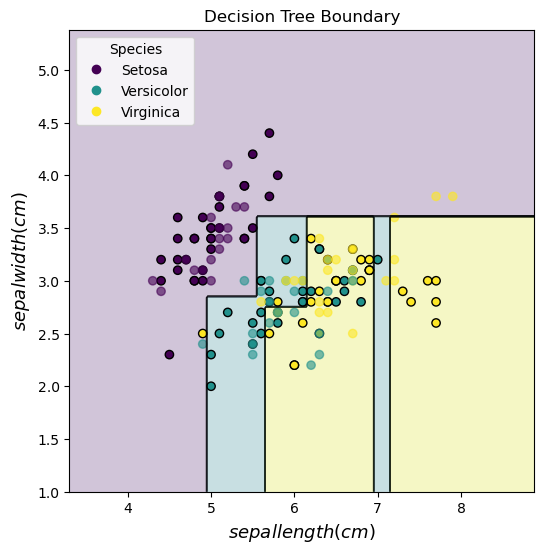

In [7]:
#Creating mesh grid                                               #[1] Citation
x_val1, y_val1 = np.meshgrid(np.arange(x1_min, x1_max, 0.02)               
                     , np.arange(y_min, y_max, 0.02))                      
y_ = np.arange(y_min, y_max, 0.02)                                         

Z = Decision_Tree_C.predict(np.c_[x_val1.ravel(), y_val1.ravel()])        #
Z = Z.reshape(x_val1.shape)                                               

#Plotting the Graph
fig, ax = plt.subplots(figsize=(6,6))

contour= ax.contourf(x_val1, y_val1, Z, cmap='viridis', alpha=0.25)
ax.set_xlabel('$sepal length (cm)$', fontsize=13)
ax.set_ylabel('$sepal width (cm)$', fontsize=13)
ax.set_title('Decision Tree Boundary')
plt.contour(x_val1, y_val1, Z, colors='k', linewidths=0.4)

#Plotting Train Data
scatter1_train= ax.scatter(x1_train.iloc[:,0], x1_train.iloc[:,1], c=y1_train, cmap='viridis', edgecolors='k')
#Plotting Testing Data
ax.scatter(x1_test.iloc[:, 0], x1_test.iloc[:, 1], c=y1_test, cmap='viridis',alpha=0.6)
legend1 = ax.legend(*scatter1_train.legend_elements(num=2),
                    loc="upper left", title="Species")
legend1.get_texts()[0].set_text('Setosa')
legend1.get_texts()[1].set_text('Versicolor')
legend1.get_texts()[2].set_text('Virginica')

The data points which have high opacity are training data points and the low opacity are testing data points

#### Increasing the Depth of tree leads to overfitting

## Taking different features into account for the Decision Tree

Taking 2nd and 3rd columns/features(sepal width and petal length)

In [8]:
#Take Inputs and Target
x2=iris_df.iloc[:,1:3]

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, test_size=.4)
#Decision Tree Classifier and fit
Decision_Tree_C=DecisionTreeClassifier(criterion= 'gini', max_depth= 4, min_samples_split= 4)
Decision_Tree_C.fit(x2_train,y2_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=4)

In [9]:
#Determing max, min                                #[1] Citation
x2_min,x2_max=x2.iloc[:,0].min()-1, x2.iloc[:,0].max()+1                       
y_min,y_max=x2.iloc[:,1].min()-1, x2.iloc[:,1].max()+1                         

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



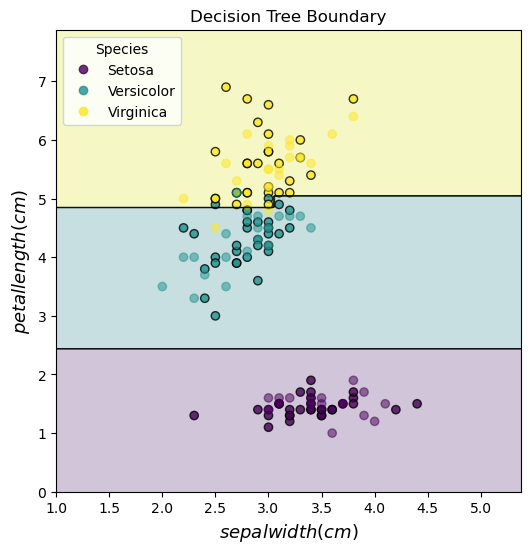

In [10]:
#Creating mesh grid                                #[1] Citation
x_val2, y_val2 = np.meshgrid(np.arange(x2_min, x2_max, 0.02)                            
                     , np.arange(y_min, y_max, 0.02))
y_ = np.arange(y_min, y_max, 0.02)                                             

Z = Decision_Tree_C.predict(np.c_[x_val2.ravel(), y_val2.ravel()])             
Z = Z.reshape(x_val2.shape)                                                    

#Plotting the Graph
fig, ax = plt.subplots(figsize=(6,6))

contour= ax.contourf(x_val2, y_val2, Z, cmap='viridis', alpha=0.25)
ax.set_xlabel('$sepal width (cm)$', fontsize=13)
ax.set_ylabel('$petal length (cm)$', fontsize=13)
ax.set_title('Decision Tree Boundary')
plt.contour(x_val2, y_val2, Z, colors='k', linewidths=0.4)

#Plot training data
scatter2_train= ax.scatter(x2_train.iloc[:,0], x2_train.iloc[:,1], c=y2_train, cmap='viridis', edgecolors='k',alpha=0.8)
#Plot testing data
ax.scatter(x2_test.iloc[:, 0], x2_test.iloc[:, 1], c=y2_test, cmap='viridis',alpha=0.5)

legend2 = ax.legend(*scatter2_train.legend_elements(num=2),
                    loc="upper left", title="Species")
legend2.get_texts()[0].set_text('Setosa')
legend2.get_texts()[1].set_text('Versicolor')
legend2.get_texts()[2].set_text('Virginica')

The data points which have high opacity are training data points and the low opacity are testing data points

Taking 3rd and 4th columns/features(petal length and petal width)

In [11]:
#Take Inputs and Target
x3=iris_df.iloc[:,2:4]

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y, test_size=.4)
#Decision Tree Classifier and fit
Decision_Tree_C=DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_split= 4)
Decision_Tree_C.fit(x3_train,y3_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=4)

In [12]:
### Determing max, min                                      #[1] Citation
x3_min,x3_max=x3.iloc[:,0].min()-1, x3.iloc[:,0].max()+1                          
y_min,y_max=x3.iloc[:,1].min()-1, x3.iloc[:,1].max()+1                            

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



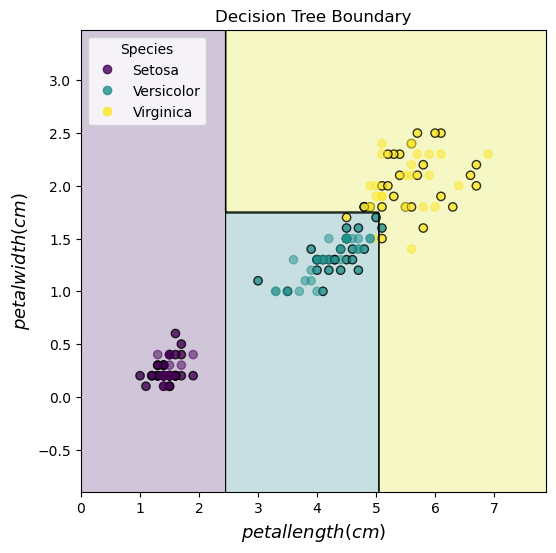

In [13]:
#Creating mesh grid                                         #[1] Citation
x_val3, y_val3 = np.meshgrid(np.arange(x3_min, x3_max, 0.02)                      
                     , np.arange(y_min, y_max, 0.02)) 
y_ = np.arange(y_min, y_max, 0.02)                                               

Z = Decision_Tree_C.predict(np.c_[x_val3.ravel(), y_val3.ravel()])                
Z = Z.reshape(x_val3.shape)                                                       

#Plotting the Graph
fig, ax = plt.subplots(figsize=(6,6))

contour= ax.contourf(x_val3, y_val3, Z, cmap='viridis', alpha=0.25)
ax.set_xlabel('$petal length (cm)$', fontsize=13)
ax.set_ylabel('$petal width (cm)$', fontsize=13)
ax.set_title('Decision Tree Boundary')
plt.contour(x_val3, y_val3, Z, colors='k', linewidths=0.4)

#Plot training data
scatter3_train= ax.scatter(x3_train.iloc[:,0], x3_train.iloc[:,1], c=y3_train, cmap='viridis', edgecolors='k',alpha=0.8)
#Plot testing data
ax.scatter(x3_test.iloc[:, 0], x3_test.iloc[:, 1], c=y3_test, cmap='viridis',alpha=0.5)
legend3 = ax.legend(*scatter3_train.legend_elements(num=2),
                    loc="upper left", title="Species")
legend3.get_texts()[0].set_text('Setosa')
legend3.get_texts()[1].set_text('Versicolor')
legend3.get_texts()[2].set_text('Virginica')

The data points which have high opacity are training data points and the low opacity are testing data points

Decision Boundaries of 2nd and 3rd graph are fitted good but we can increase the fit by increasing the depth of tree.

Similarly we can do for different features.

# Reference

[1]. https://www.kaggle.com/code/arthurtok/decision-boundaries-visualised-via-python-plotly/notebook